<a href="https://colab.research.google.com/github/fabiobaroliveira/analise_exploratoria_de_dados/blob/main/projeto_seguradora/analise_exploratoria_seguro_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Seguro Saúde


# Tópicos

1. Introdução e Preparação Inicial dos Dados
2. Limpeza e Pré-processamento de Dados
3. Análises
4. Insights e Conclusões


## 1. Introdução

- Objetivo dessa análise é identificar padrões de tendências entre os segurados e sua relação com as depesas.

- Os dados são de um dataset retirado do Kaggle, com o nome originalmente "[US Health Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/data)" ele contém dados de segurados em um plano de saúde e algumas de suas características.

## 2. Carregamento e Inspeção Inicial

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import kagglehub

In [ ]:
# Download versão mais atual
path = kagglehub.dataset_download("teertha/ushealthinsurancedataset")
print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 18.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/teertha/ushealthinsurancedataset/versions/1


In [ ]:
# Carrega arquivo baixado
file_path = '/kaggle/input/ushealthinsurancedataset/insurance.csv'
df = pd.read_csv(file_path)

In [ ]:
# Carrega arquivo baixado
file_path = '/root/.cache/kagglehub/datasets/teertha/ushealthinsurancedataset/versions/1/insurance.csv'
df = pd.read_csv(file_path)

In [ ]:
#Verificando as primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Verificando as últimas linhas
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
#Verificando informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Estastisticas categoricas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Estatisticas não categoricas
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Análise

### Verificando distribuição de idade pelo grupo segurado

In [52]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribuição de Idade')

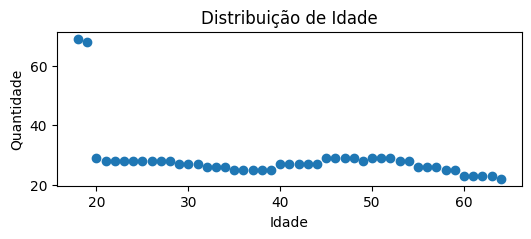

In [61]:
# import matplotlib.pyplot as plt

# Agrupar dados

distribuicao_idade = df['age'].value_counts().sort_index()


#cria o gráfico
plt.figure(figsize=(6,2))
plt.scatter(distribuicao_idade.index, distribuicao_idade.values)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição de Idade')

### Calculando custo médio por idade

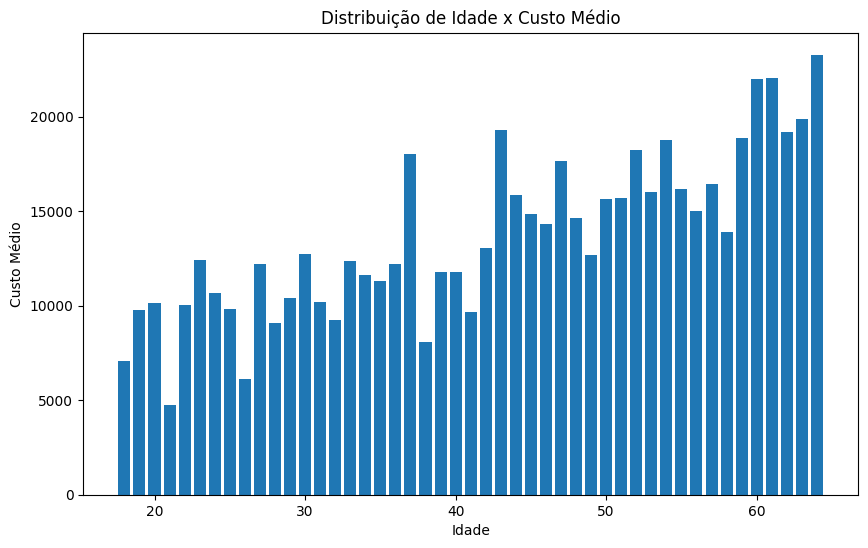

In [62]:
# import matplotlib.pyplot as plt

# Agrupar dados

idade_custo_medio = df.groupby('age')['charges'].mean()

#cria o gráfico
plt.figure(figsize=(10,6))
barras = plt.bar(idade_custo_medio.index, idade_custo_medio.values)
plt.xlabel('Idade')
plt.ylabel('Custo Médio')
plt.title('Distribuição de Idade x Custo Médio')
plt.show()

### Distribuição de fumantes e não fumantes

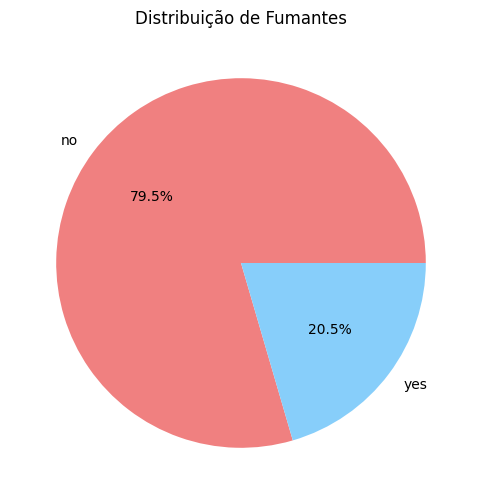

In [55]:
# import matplotlib.pyplot as plt

# Agrpando dados

fumantes_porcentagem = df['smoker'].value_counts(normalize=True) * 100

#cria o gráfico
plt.figure(figsize=(10,6))
cores = ['lightcoral', 'lightskyblue']
plt.pie(fumantes_porcentagem, labels=fumantes_porcentagem.index, autopct='%1.1f%%', colors=cores)
plt.title('Distribuição de Fumantes')
plt.show()

### Custo médio por fumantes x não fumantes

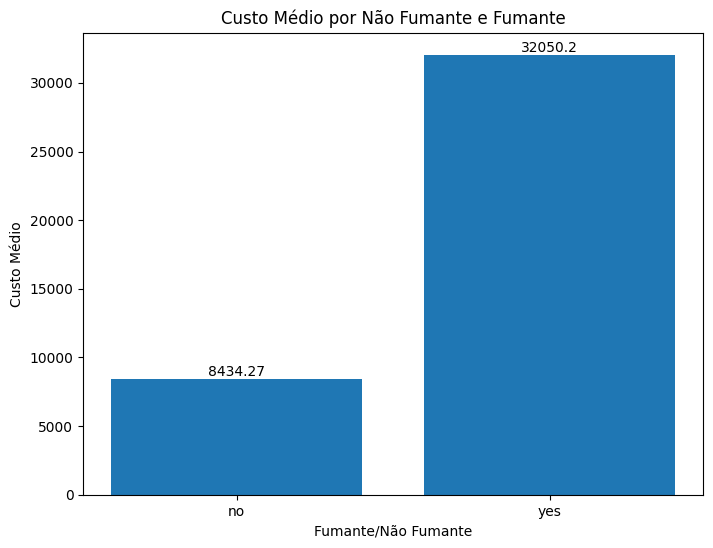

In [56]:
# import matplotlib.pyplot as plt

# Agrupar dados
custo_medio_fumantes_nao_fumantes = df.groupby('smoker')['charges'].mean()


plt.figure(figsize=(8,6))
barras = plt.bar(custo_medio_fumantes_nao_fumantes.index, custo_medio_fumantes_nao_fumantes.values)
plt.bar_label(barras)
plt.xlabel('Fumante/Não Fumante')
plt.ylabel('Custo Médio')
plt.title('Custo Médio por Não Fumante e Fumante')
plt.show()
